In [7]:
import os
import pandas as pd

In [8]:
mobsuite= pd.read_csv('/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_EcoliPlasmidDetection_isolates_crosstab_mobsuite_analysisfriendly_no_PP.csv')

In [9]:
mobsuite['Source_Condition'] = mobsuite.apply(lambda row: '_'.join([row['Source'], row['Category']]), axis=1)

In [10]:
#Two way ANOVA showing impact of Source and Condition of Total Number of Plasmid Clusters detected minus novel plasmids
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp

results = []
    #make the model
model = smf.ols('Corrected_Total_Plasmids ~ C(Source) + C(Category) + C(Source):C(Category)', data=mobsuite).fit()
    #calculate anova. We use type 3 error correction in this paper.
d = sm.stats.anova_lm(model, typ=3)
    # We only care about the F statistic in this case. grab it.
d = d[['PR(>F)']]
results.append(d)
#Compile the results into one dataframe
all_r = results[0]
for d in results[1:]:
    all_r = all_r.join(d)
all_r = all_r.dropna().iloc[1:].dropna()
all_r

,PR(>F)
C(Source),0.856928
C(Category),0.989578
C(Source):C(Category),0.999635


[(('HLF', 'Cecal'), ('HLF', 'Diseased')), (('HLUF', 'Cecal'), ('HLUF', 'Diseased')), (('HRF', 'Cecal'), ('HRF', 'Diseased')), (('HRUF', 'Cecal'), ('HRUF', 'Diseased')), (('LLFM', 'Cecal'), ('LLFM', 'Diseased')), (('LLF', 'Cecal'), ('LLF', 'Diseased')), (('LLFMP', 'Cecal'), ('LLFMP', 'Diseased')), (('LLUFM', 'Cecal'), ('LLUFM', 'Diseased')), (('LLUFMP', 'Cecal'), ('LLUFMP', 'Diseased')), (('LLUF', 'Cecal'), ('LLUF', 'Diseased')), (('LRF', 'Cecal'), ('LRF', 'Diseased')), (('LRFM', 'Cecal'), ('LRFM', 'Diseased')), (('LRFMP', 'Cecal'), ('LRFMP', 'Diseased')), (('LRUF', 'Cecal'), ('LRUF', 'Diseased')), (('LRUFM', 'Cecal'), ('LRUFM', 'Diseased')), (('LRUFMP', 'Cecal'), ('LRUFMP', 'Diseased'))]
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LLUFMP_Cecal vs. LLUFMP_Diseased: t-test independent samples, P_val:4.892e-01 t=-7.070e-01
LRF_Cecal vs. LRF_Diseased: t-t

(<AxesSubplot:xlabel='Category', ylabel='Corrected_Total_Plasmids'>,
  <statannotations.Annotation.Annotation at 0x7f0a4003fa30>])

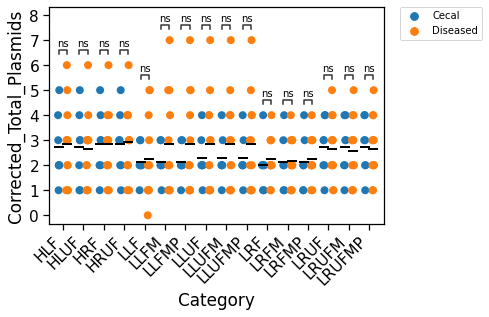

In [11]:
# figure showing the impact of Source and Condition of total number of plasmid clusters detected
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

#making lists with the unique values of Tissue_Time and Vaccine column
s = mobsuite['Category'].unique() #All the unique feature types.
h = mobsuite['Source'].unique() #All the unique habitats.
#Make a dict with 'Vaccine' keys. each entry in the dict points to a list of all the habitats
d = {} 
for i in s:
    d[i] = list(h)

#Use the dict to make the pairs
pairs = []
for i in d:
    stuff = it.combinations(d[i], r=2)
    for j in stuff:
        pairs.append( ((i, j[0]), (i, j[1])) )
print(pairs)
##############################################
states_subcat = ["HLF", "HLUF", "HRF", "HRUF", "LLF", "LLFM", "LLFMP", "LLUF", "LLUFM", "LLUFMP", "LRF", "LRFM", "LRFMP", "LRUF", "LRUFM", "LRUFMP"]
states_order = ["Cecal", "Diseased"]
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuite, 'x': 'Category', 'y': 'Corrected_Total_Plasmids', "order": states_subcat, 'hue': 'Source', "hue_order": states_order, "palette": state_palette} # Plot with seaborn
    ax = sns.stripplot(x="Category", y="Corrected_Total_Plasmids", data=mobsuite, size=8, order=states_subcat, hue="Source", dodge=True)
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Category",
            y="Corrected_Total_Plasmids",
            data=mobsuite,
            showfliers=False,
            showbox=False,
            showcaps=False,
            hue="Source",
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

In [12]:
mobsuite_results = pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_All_20_Isolates_All_Assemblies_mobsuite_results_processed_sorted_withPP_analysisfriendly.csv")

In [13]:
mobsuite_nonovel = mobsuite_results[mobsuite_results["sample_id"].str.contains("novel")==False]

In [14]:
mobsuitecrosstab = pd.crosstab(mobsuite_nonovel.sample_id, mobsuite_nonovel.Isolate_Pathname)

In [15]:
mPA= mobsuitecrosstab.sum(axis = 1)

In [16]:
PA2 = pd.DataFrame(data=mPA)
PA3 = PA2.reset_index()
PA3.columns = ['Plasmid_Cluster', 'Total']

In [17]:
PA3

,Plasmid_Cluster,Total
0,AA162,27
1,AA175,90
2,AA176,88
3,AA178,16
4,AA179,32
5,AA281,34
6,AA313,16
7,AA315,11
8,AA329,37
9,AA372,15


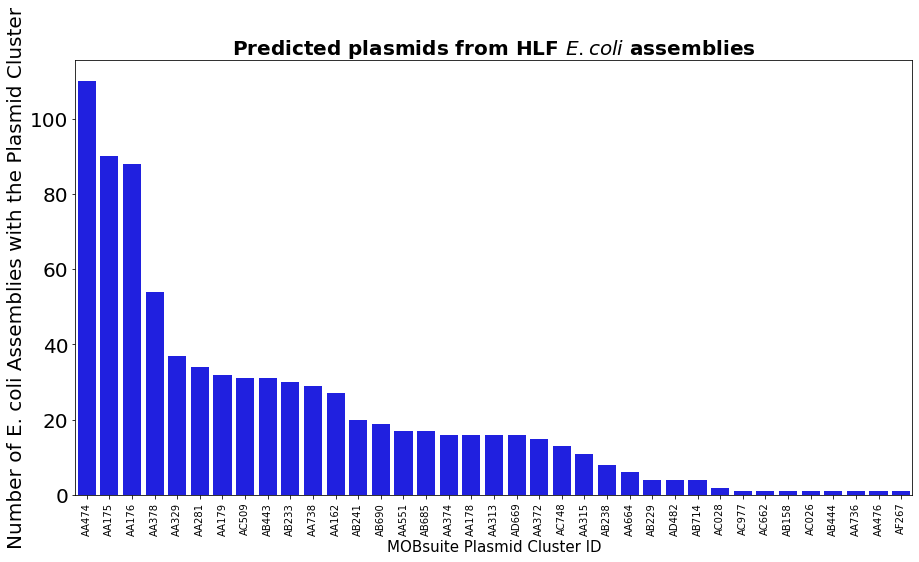

In [18]:
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.barplot(x="Plasmid_Cluster", y="Total", data=PA3,color='b', order=PA3.sort_values('Total',ascending = False).Plasmid_Cluster)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from HLF $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
plt.ylabel("Number of E. coli Assemblies with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("12122022_EcoliPlasmidDetection_plasmidbarplotallassemblies.png", dpi=400, bbox_inches="tight")

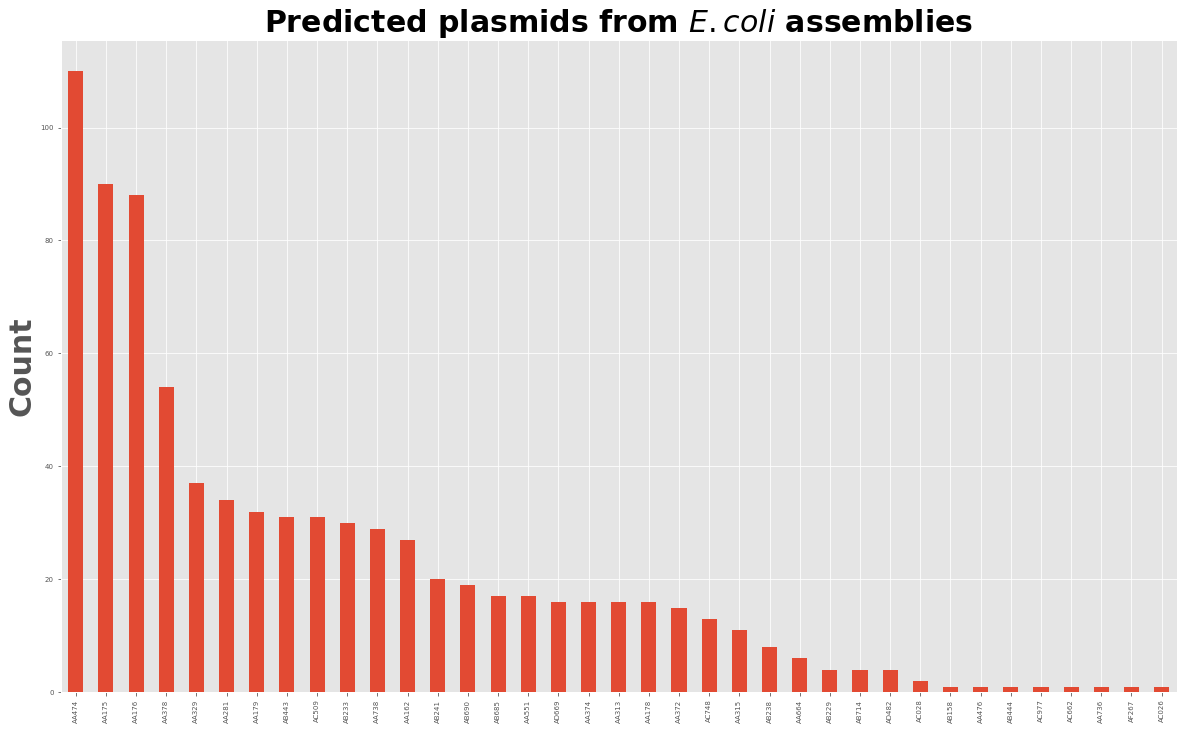

In [19]:
plt.style.use('ggplot')
plt.rcParams['axes.labelweight'] = 'bold'
mobsuite_nonovel['sample_id'].value_counts().plot(kind = 'bar', figsize=(20,12), fontsize = 7)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 30, fontweight = 'bold') #use r in front and dollar sign to make text italic

plt.ylabel('Count', fontsize = 30)
plt.show()

In [20]:
mobsuite.head()

,Isolate_Name,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,Source,Total_Plasmids,Novel_Plasmids,Corrected_Total_Plasmids,...,AD669,AD672,AF232,novel_2322954e0f000185b3ba09930f34b0b6,novel_3af6fdd16efdea36d5133ff83db1e75b,novel_8b26a5561d3c7fe6f50aa07ffc17fb81,novel_99544529fdcb38c44b82220d786a6278,novel_bffed22aa7581f584083d6fc0af91ea5,novel_d22f9a581621d0dd6e78c167f53c3623,Source_Condition
0,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,Cecal,3,0,3,...,0,0,0,0,0,0,0,0,0,Cecal_HLF
1,EC-A-0012-C5-H-CuP-CeN,HLUF,Hybrid,Ligation,Unfiltered,Pilon,Cecal,3,0,3,...,0,0,0,0,0,0,0,0,0,Cecal_HLUF
2,EC-A-0012-C5-H-CuP-CeN,HRF,Hybrid,Rapid,Filtered,Pilon,Cecal,3,0,3,...,0,0,0,0,0,0,0,0,0,Cecal_HRF
3,EC-A-0012-C5-H-CuP-CeN,HRUF,Hybrid,Rapid,Unfiltered,Pilon,Cecal,3,0,3,...,0,0,0,0,0,0,0,0,0,Cecal_HRUF
4,EC-A-0012-C5-H-CuP-CeN,LLFM,Long_Read,Ligation,Filtered,Medaka,Cecal,2,0,2,...,0,0,0,0,0,0,0,0,0,Cecal_LLFM


In [21]:
mobsuite_results= pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_All_20_Isolates_All_Assemblies_mobsuite_results_processed_sorted_withPP_analysisfriendly.csv")

In [22]:
mobsuiteHLF = mobsuite_results[mobsuite_results["Category"].str.contains("HLF")]

In [23]:
mobsuiteHLF.head()

,Isolate_Pathname,Category,Assembly_Type,Sequencing_Kit,Filtering,Polishing,sample_id,num_contigs,size,gc,...,mash_neighbor_identification,primary_cluster_id,secondary_cluster_id,predicted_host_range_overall_rank,predicted_host_range_overall_name,observed_host_range_ncbi_rank,observed_host_range_ncbi_name,reported_host_range_lit_rank,reported_host_range_lit_name,associated_pmid(s)
0,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AB443,1,5569,46.794757,...,Escherichia coli,AB443,AK226,multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",multi-phylla,"Actinobacteria,Bacteroidetes,Firmicutes,Proteo...",genus,Escherichia,6263753; 17122402; 26802429
1,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AC748,1,2089,47.199617,...,Escherichia coli,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
2,EC-A-0012-C5-H-CuP-CeN,HLF,Hybrid,Ligation,Filtered,Pilon,AA329,1,93702,52.034108,...,Escherichia coli O26:H11 str. 11368,AA329,-,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
38,EC-A-0205-C9-H-CuP-CeP,HLF,Hybrid,Ligation,Filtered,Pilon,AA329,1,70710,52.225993,...,Escherichia coli O26:H11 str. 11368,AA329,AI236,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-
39,EC-A-0205-C9-H-CuP-CeP,HLF,Hybrid,Ligation,Filtered,Pilon,AC748,1,2089,47.199617,...,Escherichia coli,AC748,AM073,family,Enterobacteriaceae,family,Enterobacteriaceae,-,-,-


In [24]:
PA = pd.crosstab(mobsuiteHLF.sample_id, mobsuiteHLF.Isolate_Pathname)

In [25]:
PA.head()

Isolate_Pathname,EC-A-0012-C5-H-CuP-CeN,EC-A-0205-C9-H-CuP-CeP,EC-A-4957-3S1-D-CuP-CeN,EC-A-4957-C3-H-CuP-CeP,EC-A-6245-C4-H-CuP-CeP,EC-A-9619-3S1-D-CuP-CeP,EC-B1-7578-1L2-D-CuP-CeP,EC-B1-9226-C5-H-CuN-CeP,EC-B1-9413-C4-H-CuP-CeP,EC-B2-0012-2L1-D-CuN-CeP,EC-C-23315-C5-H-CuP-CeP,EC-C-6245-1H1-D-CuP-CeP,EC-D-9226-2S1-D-CuP-CeP,EC-D-9226-3H1-D-CuP-CeP,EC-E-2402-1H1-D-CuP-CeP,EC-E-3862-S2-D-CuP-CeP,EC-E-6245-2L1-D-CuP-CeP,EC-G-0205-3S1-D-CuP-CeP,EC-G-9619-2L1-D-CuP-CeP
sample_id,,,,,,,,,,,,,,,,,,,
AA162,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
AA175,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0
AA176,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
AA178,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
AA179,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
PA2= PA.sum(axis = 1)

In [27]:
PA3 = pd.DataFrame(data=PA2)
PA4 = PA3.reset_index()
PA4.columns = ['Plasmid_Cluster', 'Total']

In [28]:
PA4.head()

,Plasmid_Cluster,Total
0,AA162,2
1,AA175,6
2,AA176,6
3,AA178,1
4,AA179,2


In [29]:
PA5 = PA4[PA4["Plasmid_Cluster"].str.contains("novel")==False]

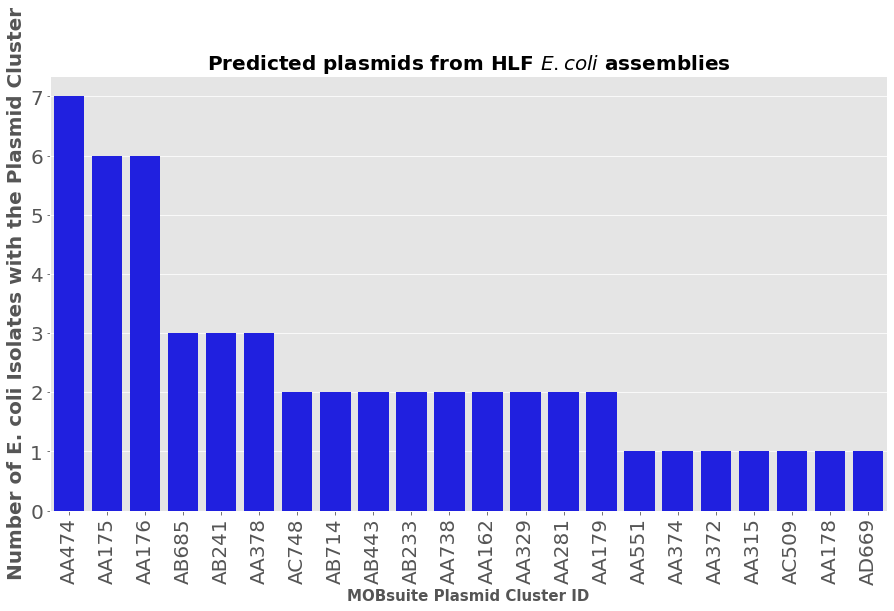

In [30]:
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.barplot(x="Plasmid_Cluster", y="Total", data=PA5,color='b', order=PA5.sort_values('Total',ascending = False).Plasmid_Cluster)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from HLF $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
plt.ylabel("Number of E. coli Isolates with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.savefig("12122022_EcoliPlasmidDetection_plasmidbarplot.png", dpi=400, bbox_inches="tight")

In [31]:
allplasmids = pd.read_csv("/home/haley/Desktop/Complete_Assemblies_Plasmid/12122022_All plasmid IDs_for Haley_Dec12_2022.csv")

In [32]:
allplasmids.head()

,Plasmid_IDs,Number
0,AA736,1
1,AA162,2
2,AA163,1
3,AA175,6
4,AA176,8


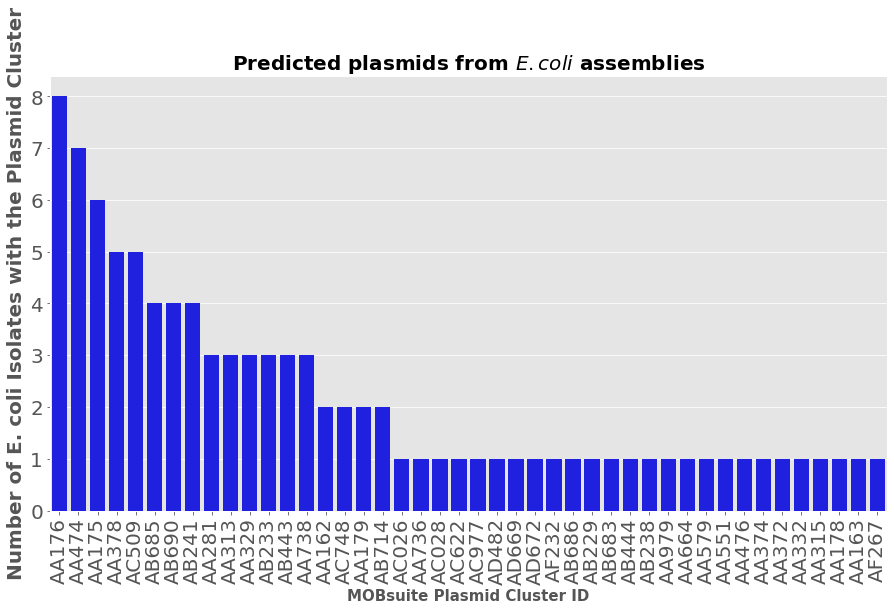

In [33]:
import seaborn as sns

plt.figure(figsize = (15,8))
ax = sns.barplot(x="Plasmid_IDs", y="Number", data=allplasmids,color='b', order=allplasmids.sort_values('Number',ascending = False).Plasmid_IDs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted plasmids from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("MOBsuite Plasmid Cluster ID",fontsize = 15)
plt.ylabel("Number of E. coli Isolates with the Plasmid Cluster",fontsize = 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.savefig("12122022_EcoliPlasmidDetection_plasmidbarplot.png", dpi=400, bbox_inches="tight")